<a href="https://colab.research.google.com/github/kdemertzis/MSc-Bio/blob/main/EDA_in_Python-Diabetes_Dataset_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis in Python**


###  PIMA INDIANS DIABETES DATASET

Το σύνολο δεδομένων **Pima Indian Diabetes**, που προέρχεται από το Εθνικό Ινστιτούτο Διαβήτη και Πεπτικών και Νεφροπαθειών. Στόχος είναι να προβλέψει διαγνωστικά εάν ένας ασθενής έχει διαβήτη ή όχι με βάση ορισμένες διαγνωστικές μετρήσεις που περιλαμβάνονται στο σύνολο δεδομένων. Περιέχει πληροφορίες για 768 γυναίκες, όπου 258 ήταν θετικές και 500 αρνητικές. Στο σύνολο υπάρχει μία μεταβλητή στόχος (εξαρτημένη) για το εάν το εξαρτιζόμενο άτομο είναι ή όχι θετικό στον Διαβήτη, ενώ ως ανεξάρτητες μεταβλητές υπάρχουν τα ακόλουθα χαρακτηριστικά:



1. Pregnancies (αριθμός εγκυμοσύνων)  
1. Oral Glucose Tolerance Test - OGTT (δίωρη συγκέντρωση γλυκόζης στο πλάσμα μετά από χορήγηση 75g άνυδρης γλυκόζης σε mg/dl  
1. Blood Pressure (διαστολική αρτηριακή πίεση σε mmHg)  
2. Skin Thickness (πάχος πτυχής δέρματος τρικεφάλου σε mm)  
2. Insulin (ινσουλίνη ορού 2 ωρών σε mu U/m)  
2. BMI (Δείκτης Μάζας Σώματος σε kg/m)  
2. Age (ηλικία) 
2. Pedigree Diabetes Function (λειτουργία που αντιπροσωπεύει πόσο πιθανό είναι να νοσήσουν από το ιστορικό των προγόνων τους) 
2. Outcome (0-Δεν έχουν Διαβήτη / 1-Έχουν Διαβήτη) 


In [1]:
#Εισαγωγή βιβλιοθηκών

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
#Θέση αρχείου που περιέχει το σύνολο δεδομένων

url="https://raw.githubusercontent.com/kdemertzis/MSc-Bio/main/Data/diabetes.csv"

In [3]:
#Φόρτωση αρχείου CSV με χρήση Pandas

pima = pd.read_csv(url)

#### Exploratory Data Analysis (EDA) & Descriptive Statistics using Python 

In [4]:
# Έλεγχος τύπου

type(pima)

pandas.core.frame.DataFrame

In [5]:
# Έλεγχος διαστάσεων DataFrame

pima.shape

(768, 9)

In [6]:
# Έλεγχος δεικτών κάθε σειράς 

pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [7]:
# Έλεγχος ονομάτων κάθε στήλης 

pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Προβολή των αρχικών σειρών του DataFrame

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Έλεγχος τύπου δεδομένων κάθε μεταβλητής 

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# Τροποποίηση του τύπου δεδομένων μιας στήλης

print(pima.BMI.dtypes)
pima["BMI"] = pima.BMI.astype(np.float16)
print(pima.BMI.dtypes)

float64
float16


In [11]:
# Εκτύπωση περιγραφικών πληροφοριών για το DataFrame

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float16
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float16(1), float64(1), int64(7)
memory usage: 49.6 KB


In [12]:
# Εκτύπωση περιγραφικών στατιστικών για το DataFrame

pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.000000,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.882812,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.420000,81.000000,1.000000


In [13]:
# Έλεγχος ελλειπουσών τιμών

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Ταξινόμηση DataFrame

pima.sort_values("Age")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,64,35,0,33.593750,0.543,21,1
60,2,84,0,0,0,0.000000,0.304,21,0
102,0,125,96,0,0,22.500000,0.262,21,0
182,1,0,74,20,23,27.703125,0.299,21,0
623,0,94,70,27,115,43.500000,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132,80,0,0,26.796875,0.186,69,0
684,5,136,82,0,0,0.000000,0.640,69,0
666,4,145,82,18,0,32.500000,0.235,70,1
453,2,119,0,0,0,19.593750,0.832,72,0


In [15]:
# Δημιουργία στήλης Διατροφική Kατάσταση

Nutritional_status = pd.Series([]) 

<ipython-input-15-44ad5068b8fd>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [16]:
# Διατροφική κατάσταση με βάση το ΔΜΣ

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i] 

In [17]:
# Εισαγωγή νέας στήλης - Διατροφική Κατάσταση
pima.insert(6, "Nutritional Status", Nutritional_status)

In [18]:
# Έλεγχος DataFrame με την συμπερίληψη της νέας στήλης
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.593750,Obese,0.627,50,1
1,1,85,66,29,0,26.593750,Overweight,0.351,31,0
2,8,183,64,0,0,23.296875,Normal,0.672,32,1
3,1,89,66,23,94,28.093750,Overweight,0.167,21,0
4,0,137,40,35,168,43.093750,Obese,2.288,33,1


In [19]:
# Έλεγχος των εγγραφών της νέας στήλης

pima['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

##### 11 γυναίκες δεν έχουν πληροφορίες για το ΔΜΣ. Μόνο 106 από τις 758 γυναίκες έχουν φυσιολογικό βάρος. Οι περισσότερες γυναίκες παρουσιάζονται υπέρβαρες ή με παχυσαρκία

In [20]:
# Δημιουργία στήλης Ερμηνεία του Επιπέδου Γλυκόζης (OGTT_Interpretation)

OGTT_Interpretation = pd.Series([]) 

<ipython-input-20-35b974d6ef72>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_Interpretation = pd.Series([])


In [21]:
# Ερμηνεία των Επιπέδων Γλυκόζης (χρησιμοποιώντας τα επίπεδα OGTT που συνιστώνται από το DIABETES UK 2019)

for i in range(len(pima)): 
    if pima['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif pima['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif pima['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= pima['Glucose'][i] 

In [22]:
# Εισαγωγή νέας στήλης Ερμηνεία των Επιπέδων Γλυκόζης (Glucose Result)
pima.insert(2, "Glucose Result", OGTT_Interpretation)

In [23]:
# Έλεγχος των εγγραφών της νέας στήλης

pima['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

##### Κανένα άτομο από το δείγμα δεν έδειξε αποτέλεσμα OGTT σε "διαβητικά επίπεδα".

In [24]:
# Έλεγχος για διαβήτη με μειωμένη ανοχή στη γλυκόζη

Impaired_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140 ) & (pima ['Glucose'] <= 198) & (pima ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

##### Δεν έχουν όλες οι γυναίκες με μειωμένη ανοχή στη γλυκόζη διαβήτη. Αυτό μπορεί να δείξει ότι τα άτομα με μειωμένη ανοχή στη γλυκόζη μπορεί να κινδυνεύουν να αναπτύξουν διαβήτη ή να είναι διαβητικά, αλλά δεν έχουν ήδη διαγνωστεί.

In [25]:
# Έλεγχος για διαβήτη φυσιολογικής γλυκόζης

Normal_Glucose_Diabetic = ((pima ['Glucose'] != 0 ) & (pima ['Glucose'] <= 140) & (pima ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

##### Οι μισές από τις διαβητικές γυναίκες εμφάνισαν φυσιολογικά επίπεδα γλυκόζης. Απαιτούνται πληροφορίες σχετικά με τη φαρμακευτική θεραπεία.

In [26]:
# Δημιουργία στήλης εκατοστίαιου πάχους δέρματος

Percentile_skin_thickness = pd.Series([]) 

<ipython-input-26-46ee7361fc56>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Percentile_skin_thickness = pd.Series([])


In [29]:
# Έλεγχος ηλικίας (το εκατοστιαίο πάχος δέρματος εξαρτάται από την πτυχή του δέρματος και την ηλικία)

pima['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [30]:
#  Έλεγχος για το εκατοστιαίο πάχος δέρματος

for i in range(len(pima)): 
    
    
    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0: 
        
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif pima["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif pima["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif pima["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif pima["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif pima["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif pima["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif pima["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif pima["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif pima["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif pima["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif pima["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"


**Σημείωση:** Καθώς έχω 2>P95, επέλεξα να προσθέσω αριθμούς μπροστά από κάθε εκατοστημόριο για να οπτικοποιήσω εύκολα σε ποιο >P95 ανήκε η εγγραφή.

In [31]:
# Εισαγωγή νέας στήλης εκατοστίαιου πάχους δέρματος (Percentile of skin thickness)

pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [32]:
# Έλεγχος των 10 πρώτων σειρών του DataFrame

pima.head(10)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.593750,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.593750,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.296875,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.093750,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.093750,Obese,2.288,33,1
5,5,116,Normal,74,0 NA,0,0,25.593750,Overweight,0.201,30,0
6,3,78,Normal,50,15 P85th - P90th,32,88,31.000000,Obese,0.248,26,1
7,10,115,Normal,0,0 NA,0,0,35.312500,Obese,0.134,29,0
8,2,197,Impaired Glucose Tolerance,70,19 >P95th,45,543,30.500000,Obese,0.158,53,1
9,8,125,Normal,96,0 NA,0,0,0.000000,NA,0.232,54,1


##### Φαίνεται ότι το εκατοστημόριο του πάχους της πτυχής του δέρματος των τρικεφάλων μπορεί να προβλέψει τη Διατροφική Κατάσταση.

In [33]:
# Έλεγχος για το εκατοστιαίο πάχος δέρματος των εγγραφών του συνόλου δεδομένων

pima['Percentile skin thickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

##### 227 γυναίκες δεν έχουν πληροφορίες σχετικά με την πτυχή του δέρματος. 
##### Το μεγαλύτερο μέρος του δείγματος έχει εκατοστιαίο ποσοστό πάχους δέρματος μεγαλύτερο από το 95ο. 
##### 53 γυναίκες είχαν τιμή κάτω από το P15 που υποδηλώνει ότι μπορεί να υποσιτίζονται. 
##### Μόνο μία γυναίκα είναι 80 ετών ή μεγαλύτερη και παρουσιάζει εκατοστημόριο πάχους δέρματος μεγαλύτερο από το 95ο.

In [34]:
# Έλεγχος για διαβητικές - υποσιτισμένες βάση πάχους δέρματος

diabetic_malnourished_st = ((pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [35]:
# Έλεγχος για διαβητικές - υποσιτισμένες βάση ΔΜΣ

diabetic_malnourished_bmi = ((pima ['BMI'] < 18.5) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [36]:
# Έλεγχος για διαβητικές - υποσιτισμένες βάση ΔΜΣ και πάχους δέρματος

diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

##### Είναι ενδιαφέρον να σημειωθεί ότι 94 διαβητικές γυναίκες ταξινομήθηκαν ως ελλιποβαρείς/υποσιτιζόμενες μόνο με βάση το πάχος του δέρματος, αλλά μόνο 2 διαβητικές γυναίκες παρουσίασαν λιποβαρή/υποσιτισμό όταν έλαβαν υπόψη το ΔΜΣ ή το ΔΜΣ και το πάχος του δέρματος. Το πάχος των πτυχών είναι δύσκολο να γίνουν μετρήσεις με ακρίβεια και χωρίς αυστηρή εκπαίδευση, γι' αυτό το λόγο χρησιμοποιούνται σπάνια σήμερα και δεν εφαρμόζονται παγκοσμίως. Επιπλέον, το πάχος της πτυχής του δέρματος μπορεί να είναι προβληματικό για τον εντοπισμό του υποσιτισμού σε πολλά άτομα, καθώς ποικίλλουν με ασθένειες όπως ο διαβήτης, η εμμηνόπαυση και η κατάσταση ενυδάτωσης. Με αυτόν τον τρόπο, περισσότερα δεδομένα θα πρέπει να συμπεριληφθούν σε αυτό το σύνολο δεδομένων για να βοηθήσουν στον εντοπισμό του υποσιτισμού χρησιμοποιώντας τη μέτρηση του πάχους των πτυχών του δέρματος.

In [37]:
# Min

pima.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                 0.0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

##### Φαίνεται ότι συμπεριλήφθηκαν μόνο ενήλικες γυναίκες καθώς η ελάχιστη ηλικία είναι τα 21 έτη. Μπορεί να παρατηρηθεί ότι ορισμένες γυναίκες δεν έχουν πληροφορίες για ορισμένες από τις ιδιότητες, όπως η γλυκόζη, η αρτηριακή πίεση κ.λπ. καθώς η ελάχιστη τιμή είναι μηδέν.

In [38]:
# Max

pima.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                   67.125
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

###### Η διατροφική κατάσταση «λιποβαρής» (Underweight) δεν πρέπει να ταξινομείται ως Μέγιστη Τιμή από ιατρική άποψη. Ωστόσο, θεωρήθηκε ως μέγιστη τιμή καθώς ξεκινά με το γράμμα U.

In [39]:
# Έλεγχος για το εάν το δείγμα που ταξινομήθηκε ως Λιποβαρές (Underweight) παρουσίασε ΔΜΣ χαμηλότερο από 18,5

pima_underweight = pima[pima['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.406250,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.203125,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.203125,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.203125,Underweight,0.299,21,0


In [40]:
#Έλεγχος διαβητικών ή όχι

pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### 500 εγγραφές μη διαβητικοί και 268 διαβητικοί

In [41]:
# Ένας άλλος τρόπος μέτρησης του αποτελέσματος (διαβήτης)
count_not_diabetic = len(pima[pima['Outcome']==0])
count_not_diabetic

500

In [42]:
# Έλεγχος του μέσου όρου χαρακτηριστικών ομαδοποιημένων κατά έκβαση (Διαβήτης)

pima.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.296875,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.156250,0.550500,37.067164


##### Φαίνεται ότι ο μέσος όρος όλων των χαρακτηριστικών είναι υψηλότερος στις διαβητικές γυναίκες.

In [43]:
# Έλεγχος του μέσου όρου χαρακτηριστικών του DataFrame

pima.mean()

<ipython-input-43-ae5a94a6b4a0>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pima.mean()


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          32.000000
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

##### Καθώς ορισμένες από τις γυναίκες δεν έχουν πληροφορίες για μια σειρά από χαρακτηριστικά, όπως η γλυκόζη, η αρτηριακή πίεση και ο ΔΜΣ, ο μέσος όρος αυτών των στοιχείων μπορεί να μην είναι σωστός. Για να λάβετε τη σωστή τιμή μόνο οι γυναίκες με τιμή > 0 θα πρέπει να συμπεριληφθούν για τον υπολογισμό του μέσου όρου.

In [44]:
# Έλεγχος για τις γυναίκες που περιέχονται πληροφορίες σχετικά με τη γλυκόζη

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [45]:
# Έλεγχος σχήματος για τις γυναίκες που περιέχονται πληροφορίες σχετικά με τη γλυκόζη

pima_glucose.shape

(763, 12)

##### Οι περισσότερες γυναίκες του δείγματος έχουν δεδομένα σχετικά με τη γλυκόζη (μόνο 5 από αυτές δεν έχουν καμία τιμή γλυκόζης), καθώς είναι μια σημαντική πληροφορία για τον έλεγχο της κατάστασης της υγείας ενός διαβητικού ατόμου.

In [46]:
# Έλεγχος του μέσου όρου της γλυκόζης από γυναίκες που δεν έχουν μηδενική τιμή γλυκόζης

pima_glucose['Glucose'].mean()

121.6867627785059

##### Ο μέσος όρος της γλυκόζης είναι στο φυσιολογικό εύρος (λιγότερο από 140 mg/dl).

In [47]:
# Έλεγχος του μέσου όρου χαρακτηριστικών ομαδοποιημένων κατά έκβαση (Διαβήτης)

pima_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.31250,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.09375,0.550605,37.052632


In [48]:
# Έλεγχος για τις ελάχιστες τιμές γλυκόζης από γυναίκες που δεν έχουν μηδενική τιμή γλυκόζης

pima_glucose['Glucose'].min()

44

In [49]:
# Έλεγχος για τις μέγιστες τιμές γλυκόζης από γυναίκες που δεν έχουν μηδενική τιμή γλυκόζης

pima_glucose['Glucose'].max()

199

##### Όπως φαίνεται παραπάνω, ορισμένες γυναίκες έχουν πληροφορίες για τη γλυκόζη αλλά όχι πληροφορίες για την ινσουλίνη. Επιπλέον, δείχνει ότι 5 γυναίκες δεν έχουν πληροφορίες για τη γλυκόζη καθώς το αποτέλεσμα δείχνει 763 σειρές. Επιπλέον, η μέγιστη τιμή της γλυκόζης είναι 199, που θεωρείται διαβητικό επίπεδο. Επομένως, ακόμη και αν διαγνωστούν με διαβήτη, δεν παρουσιάζουν υψηλή τιμή γλυκόζης. Το σύνολο δεδομένων πρέπει να περιέχει πληροφορίες σχετικά με τη φαρμακευτική θεραπεία.

In [50]:
# Έλεγχο για γυναίκες που έχουν πληροφορίες για την αρτηριακή πίεση

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [51]:
# Έλεγχος σχήματος για τις γυναίκες που έχουν πληροφορίες για την αρτηριακή πίεση

pima_BloodPressure.shape

(733, 12)

In [52]:
# Έλεγχος για τον μέσο όρο της αρτηριακής πίεσης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή αρτηριακής πίεσης)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [53]:
# Έλεγχος για το ελάχιστο της αρτηριακής πίεσης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή αρτηριακής πίεσης)

pima_BloodPressure['BloodPressure'].min()

24

In [54]:
# Έλεγχος για το μέγιστο της αρτηριακής πίεσης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή αρτηριακής πίεσης)

pima_BloodPressure['BloodPressure'].max()

122

##### 35 γυναίκες δεν έχουν πληροφορίες για την αρτηριακή πίεση καθώς το αποτέλεσμα δείχνει 733 εγγραφές. Η μέγιστη τιμή της Διαστολικής αρτηριακής πίεσης δείχνει ότι υπάρχει πιθανότητα ορισμένες γυναίκες να έχουν υπέρταση (>90 mmHg), καθώς μπορεί να διαγνωστεί όταν η αρτηριακή πίεση είναι 140/90 mmHg ή υψηλότερη (NICE, 2019). Τα διαβητικά άτομα θα πρέπει να λαμβάνουν θεραπεία με στόχο τη διαστολική αρτηριακή πίεση κάτω από 90 mmHg. Συνιστάται η μέτρηση της αρτηριακής πίεσης να γίνεται τουλάχιστον ετησίως σε ενήλικα με διαβήτη τύπου 2 χωρίς προηγουμένως διαγνωσμένη υπέρταση ή νεφρική νόσο (NICE, 2019). Η μέτρηση της συστολικής αρτηριακής πίεσης θα έπρεπε να είχε συμπεριληφθεί σε αυτό το σύνολο δεδομένων καθώς οι μελέτες δείχνουν ότι η αρτηριακή πίεση ίση ή μεγαλύτερη από 115/75 mmHg σχετίζεται με αυξημένα ποσοστά αρκετών ασθενειών, όπως καρδιακή ανεπάρκεια, νεφρική νόσο και θνησιμότητα (BOER et al, 2017). Εξετάζοντας την ελάχιστη τιμή της Διαστολικής Αρτηριακής Πίεσης (24 mmHg), είναι εντελώς εκτός του φυσιολογικού εύρους, ακόμη και όταν η καρδιά είναι «χαλαρωμένη» (μεταξύ 40 και 160 mmHg). Άτομο με Διαστολική αρτηριακή πίεση μικρότερη ή ίση με 60 mmHg έχει χαμηλή αρτηριακή πίεση (BLOOD PRESSURE UK).

In [55]:
# Έλεγχο για γυναίκες που έχουν πληροφορίες για την ινσουλίνη 

pima_insulin = pima.loc[pima['Insulin'] != 0]

In [56]:
# Έλεγχος σχήματος για τις γυναίκες που έχουν πληροφορίες για την ινσουλίνη 

pima_insulin.shape

(394, 12)

In [57]:
# # Έλεγχος για τον μέσο όρο της ινσουλίνης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή ινσουλίνης)

pima_insulin['Insulin'].mean()

155.5482233502538

In [58]:
# Έλεγχος για το ελάχιστο της ινσουλίνης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή ινσουλίνης)

pima_insulin['Insulin'].min()

14

In [59]:
# Έλεγχος για το μέγιστο της ινσουλίνης (μόνο από γυναίκες που δεν έχουν μηδενική τιμή ινσουλίνης)

pima_insulin['Insulin'].max()

846

###### Το φυσιολογικό εύρος ινσουλίνης 2 ωρών είναι από 16 έως 166 mIU/L. Η μέση τιμή της ινσουλίνης των δειγμάτων δείχνει ένα φυσιολογικό εύρος. Ωστόσο, ορισμένες γυναίκες του δείγματος φαίνεται να παρουσιάζουν υψηλό επίπεδο. Μπορεί να οφείλεται σε παχυσαρκία, πρώιμο στάδιο ΣΔ2 ή υπερβολική χορήγηση ινσουλίνης.

In [60]:
# Έλεγχος για τις γυναίκες που έχουν πληροφορίες για τον ΔΜΣ

pima_BMI = pima.loc[pima['BMI'] != 0]

In [61]:
# Έλεγχος σχήματος για τις γυναίκες που έχουν πληροφορίες για τον ΔΜΣ

pima_BMI.shape

(757, 12)

In [62]:
# Έλεγχος ΜΟ για τις γυναίκες που έχουν πληροφορίες για τον ΔΜΣ

pima_BMI['BMI'].mean()

32.47

##### Η μέση τιμή του ΔΜΣ δείχνει παχυσαρκία (ΔΜΣ >= 30 kg/m2)

In [63]:
# Έλεγχος για το ελάχιστο του ΔΜΣ (μόνο από γυναίκες που δεν έχουν μηδενική τιμή ΔΜΣ)

pima_BMI['BMI'].min()

18.2

In [64]:
# Έλεγχος για το μέγιστο του ΔΜΣ (μόνο από γυναίκες που δεν έχουν μηδενική τιμή ΔΜΣ)

pima_BMI['BMI'].max()

67.1

##### Η ελάχιστη τιμή του ΔΜΣ δείχνει ότι δεν υπάρχει περίπτωση λιποβαρών, αλλά η μέγιστη τιμή δείχνει περιπτώσεις γυναικών με νοσογόνο παχυσαρκία (ΔΜΣ >= 40kg/m2).

In [65]:
# Έλεγχος για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [66]:
# Έλεγχος σχήματος για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all.shape

(392, 12)

##### Μόνο 392 γυναίκες έχουν πληροφορίες για όλα τα χαρακτηριστικά. Αυτός ο αριθμός αντιπροσωπεύει λιγότερο από το μισό του δείγματος (περίπου το 49% των γυναικών του δείγματος έχουν όλες τις πληροφορίες για όλα τα χαρακτηριστικά).

In [67]:
# Έλεγχος των χαρακτηριστικών ομαδοποιημένων κατά έκβαση (Διαβήτης) για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

##### Από τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure) οι 262 δεν έχουν ενώ 130 έχουν Διαβήτη.

In [68]:
# Έλεγχος του μέσου όρου χαρακτηριστικών για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all.mean()

<ipython-input-68-5d61c518bd54>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pima_all.mean()


Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.093750
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [69]:
# Έλεγχος ΜΟ των χαρακτηριστικών ομαδοποιημένων κατά έκβαση (Διαβήτης) για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.75000,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.78125,0.625585,35.938462


##### Οι διαβητικές γυναίκες τείνουν να έχουν υψηλότερο αριθμό εγκυμοσύνων, υψηλότερο επίπεδο γλυκόζης, υψηλότερη αρτηριακή πίεση, πάχος δέρματος, ινσουλίνη, ΔΜΣ, Γενεαλογική Λειτουργία Διαβήτη και Ηλικία. Και οι δύο ομάδες παρουσιάζουν ΔΜΣ που υποδηλώνει παχυσαρκία. Οι γυναίκες που έχουν Διαβήτη έχουν μέσο όρο ινσουλίνης που είναι υψηλότερος από το φυσιολογικό εύρος (16 - 166 mIU/L). Και οι δύο ομάδες έχουν μέσο όρο γλυκόζης υψηλότερο από το φυσιολογικό εύρος (<= 100 mg/dL). Μπορεί να υποδηλώνει ότι ορισμένες μη διαβητικές γυναίκες κινδυνεύουν να παρουσιάσουν Διαβήτη στο μέλλον, ειδικά εκείνες με υψηλότερα επίπεδα ινσουλίνης (που μπορεί να έχουν αντίσταση στην ινσουλίνη).

In [70]:
# Έλεγχος για το ελάχιστο για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all.min()

Pregnancies                                           0
Glucose                                              56
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                        24
Percentile skin thickness                       1 <P5th
SkinThickness                                         7
Insulin                                              14
BMI                                           18.203125
Nutritional Status                               Normal
DiabetesPedigreeFunction                          0.085
Age                                                  21
Outcome                                               0
dtype: object

In [71]:
# Έλεγχος για το μέγιστο για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

pima_all.max()

Pregnancies                               17
Glucose                                  198
Glucose Result                        Normal
BloodPressure                            110
Percentile skin thickness    9 P25th - P50th
SkinThickness                             63
Insulin                                  846
BMI                                   67.125
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [72]:
# Έλεγχος για διαβητικές - υποσιτισμένες βάση πάχους δέρματος για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

diabetic_malnourished = ((pima_all ['SkinThickness'] < 15.8) & (pima_all ['Outcome'] == 1)).sum()
diabetic_malnourished

4

##### 4 από 130 διαβητικές γυναίκες υποσιτίζονται.

In [73]:
# Έλεγχος για διαβητικές - υποσιτισμένες βάση ΔΜΣ για τις γυναίκες που έχουν καταγεγραμμένες όλες τις πληροφορίες (BMI, Glucose, Insulin and Blood Pressure)

diabetic_overweight_obese = ((pima_all ['BMI'] <= 30) & (pima_all ['Outcome'] == 1)).sum()
diabetic_overweight_obese

20

##### 20 από 130 διαβητικές γυναίκες είναι υπέρβαρες ή παχύσαρκες.

### Κατανομή Ιδιοτήτων με Οπτικοποίηση Δεδομένων

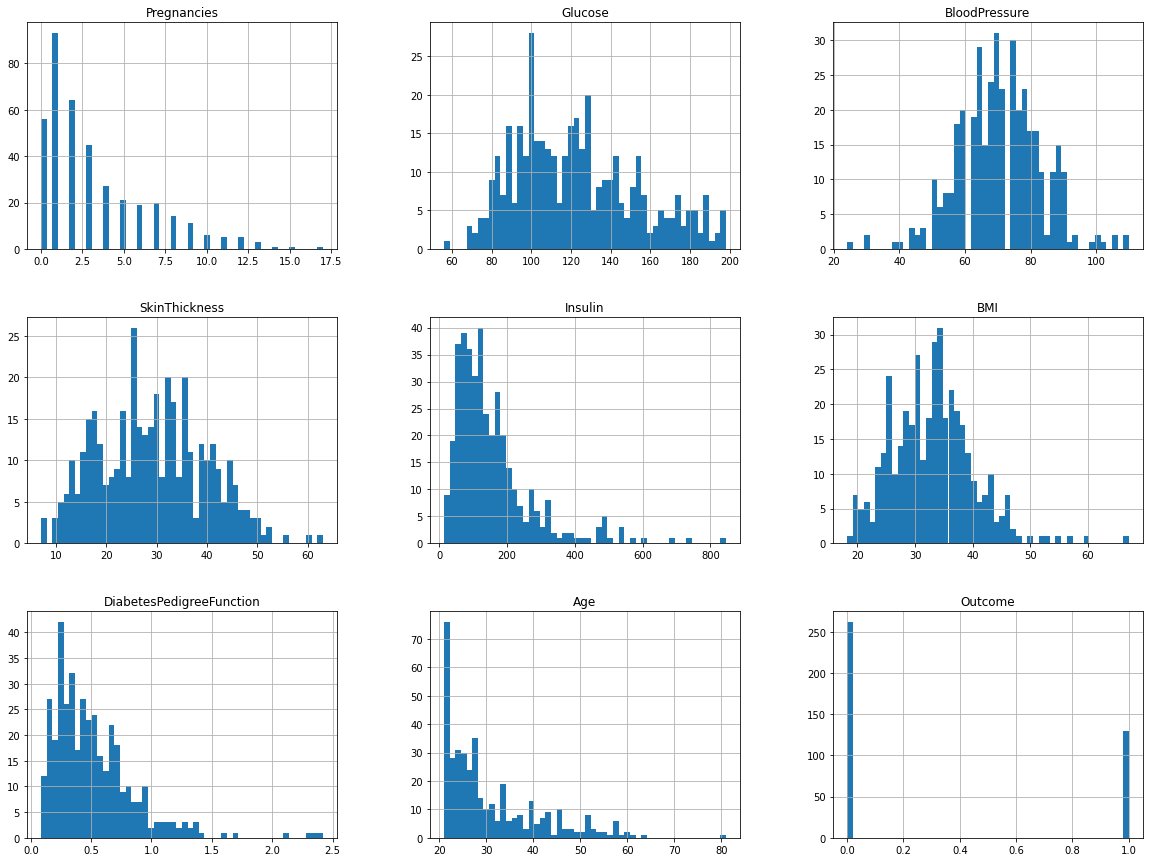

In [74]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

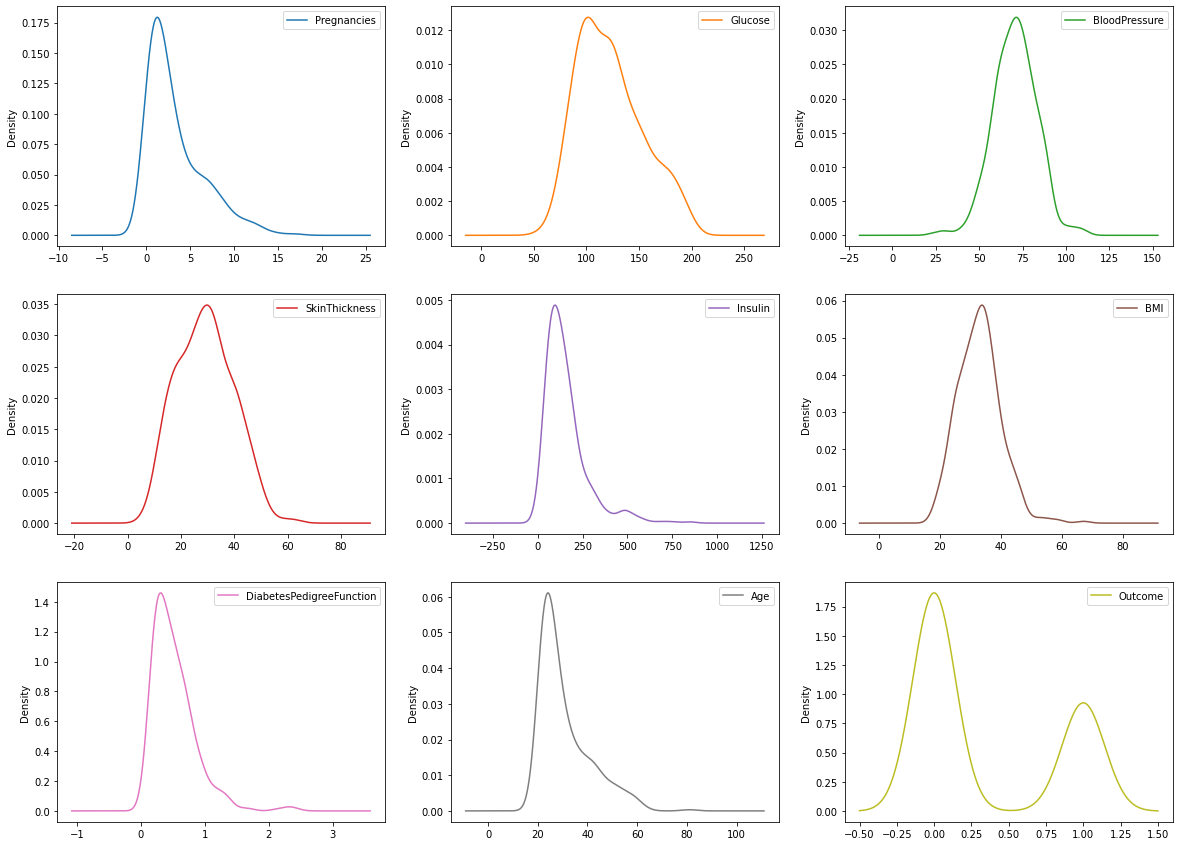

In [75]:
# Σχεδίαση πυκνότητας για να οπτικοποιηθεί η κατανομή κάθε χαρακτηριστικού
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

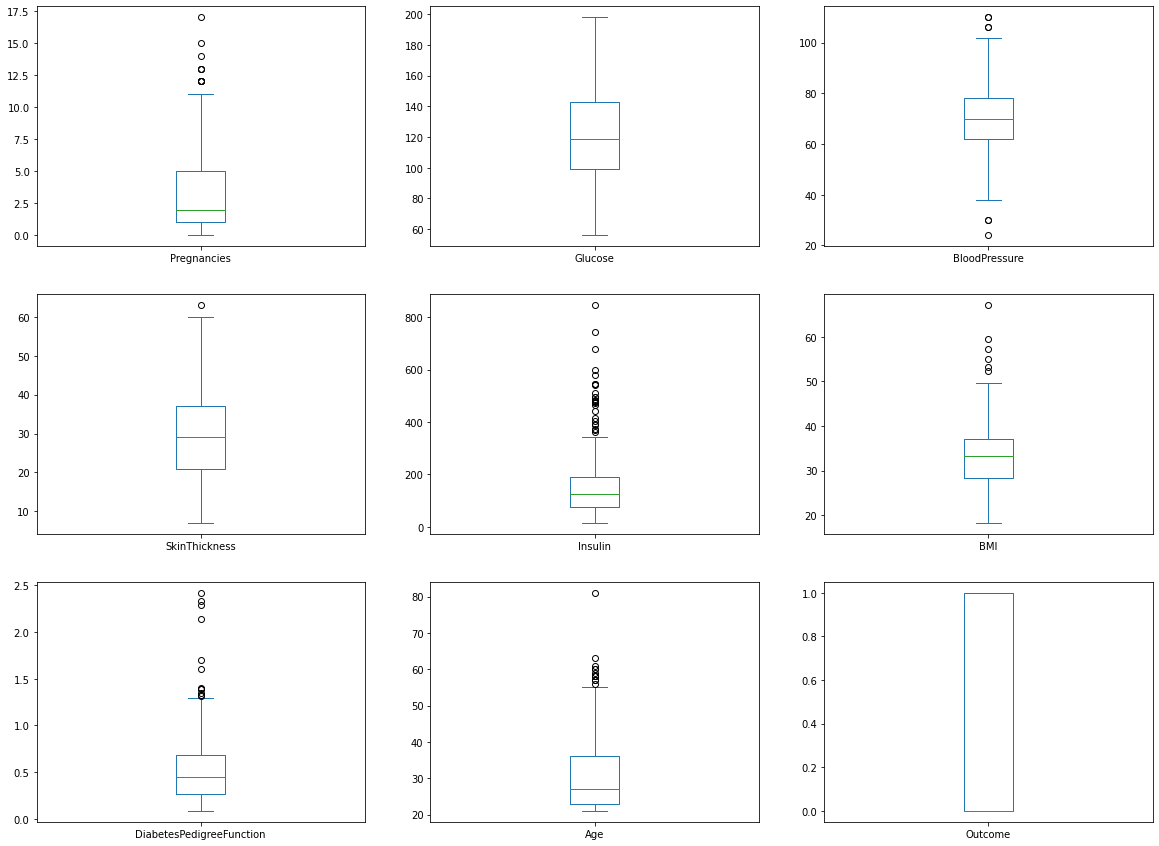

In [76]:
# Box and Whisker plots
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

## Correlation

In [77]:
# Συσχέτιση μεταξύ των διαφορετικών χαρακτηριστικών. Όσο πιο κοντά στο 1 τόσο καλύτερη είναι η συσχέτιση.

corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025418,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209492,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304408,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664331,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226324,0.135906,0.217082,0.301429
BMI,-0.025418,0.209492,0.304408,0.664331,0.226324,1.000000,0.158820,0.069763,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158820,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069763,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


#### Δεν υπάρχει ισχυρή συσχέτιση μεταξύ των χαρακτηριστικών. 
**#### Θετική συσχέτιση:**
+ Ηλικία x εγκυμοσύνες (0,68) - Οι γυναίκες μεγαλύτερης ηλικίας τείνουν να έχουν μεγαλύτερο αριθμό κυήσεων
+ Γλυκόζη x ινσουλίνη (0,58)
+ Γλυκόζη x έκβαση (0,52) - Οι γυναίκες που έχουν υψηλότερα επίπεδα γλυκόζης τείνουν να έχουν υψηλότερα επίπεδα ινσουλίνης και έχουν διαβήτη
+ Πάχος πτυχής δέρματος x ΔΜΣ (0,66) - Οι γυναίκες με υψηλότερη τιμή πάχους πτυχής δέρματος έχουν υψηλότερο ΔΜΣ (και πιθανώς είναι υπέρβαρες/παχύσαρκες)

**#### Αρνητική συσχέτιση:**
+ ΔΜΣ x Εγκυμοσύνες (-0,025)
+ Αρτηριακή πίεση x Γενεαλογική Λειτουργία Διαβήτη (-0,016)

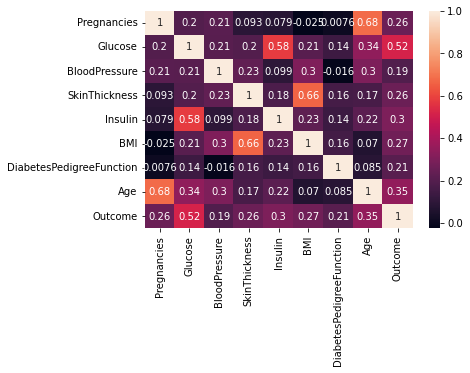

In [78]:
# Πίνακας συσχέτισης

sns.heatmap(corr_matrix_pearson, annot = True)

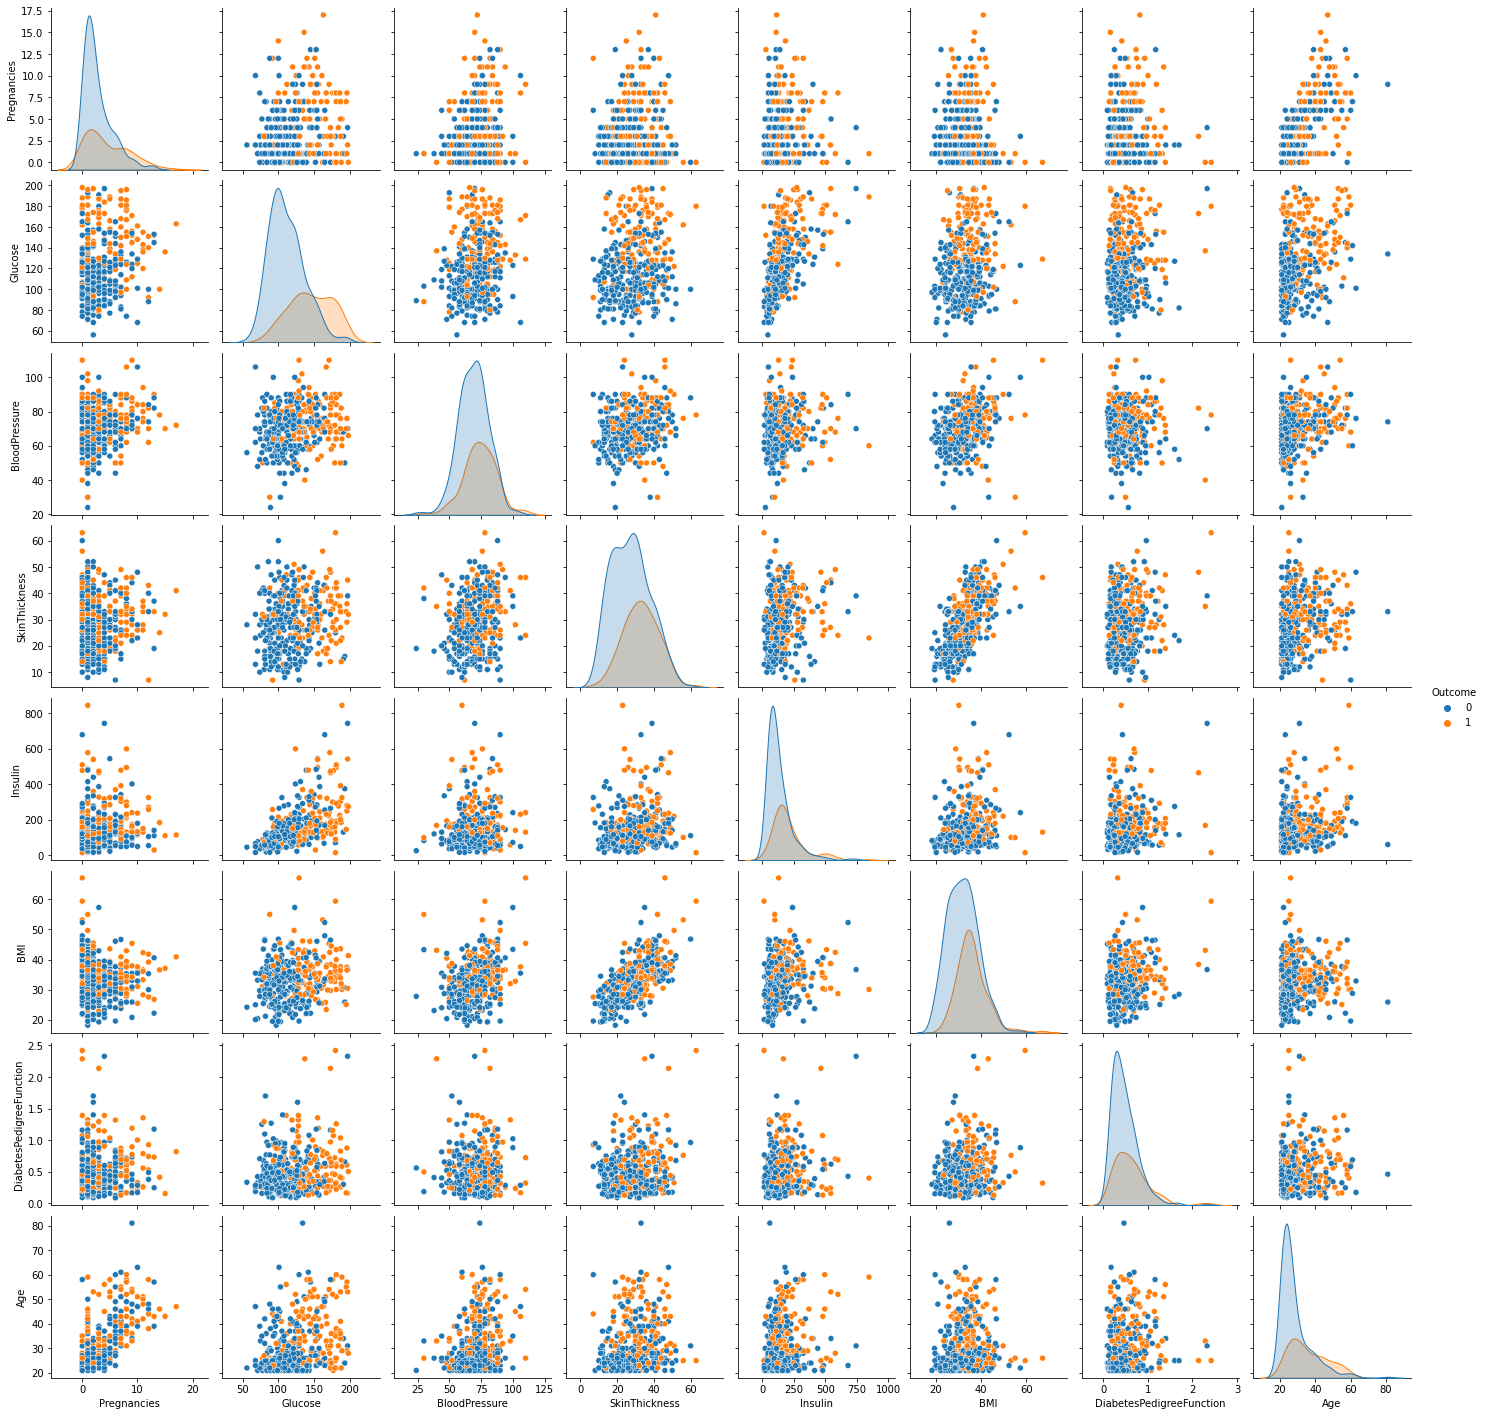

In [79]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

##### Οι διαβητικές γυναίκες τείνουν να εμφανίζουν μεγαλύτερες τιμές ηλικίας, ΔΜΣ, ινσουλίνης, πάχους δέρματος, αρτηριακής πίεσης και εγκυμοσύνες.
##### Το χαρακτηριστικό που ξεχωρίζει και είναι δυνατό να δούμε 2 διακριτές ομάδες (διαβητικούς και μη διαβητικούς) είναι η γλυκόζη.